In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.experiments import *

import matplotlib.pyplot as plt
from matplotlib import colors


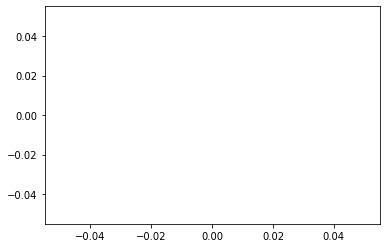

In [2]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "11",
    "font.family" : "serif",
    'figure.constrained_layout.use':True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'hatch.linewidth':0.1
})

e_order = ['CHIME',
          'HETDEX',
          'COMAP',
           'CCAT-prime',
           'SPHEREx',
]

In [3]:
plt_left = plt.rcParams['figure.subplot.left']
plt_right = plt.rcParams['figure.subplot.right']
plt_cntr = (plt_left + plt_right) / 2

In [4]:

from LIMxCMBL.noise import f_eIeI


In [5]:
_alphas = {
    'CHIME': 150,
    'HETDEX': 400,
    'COMAP': 250,
    'SPHEREx': 250,
    'CCAT-prime': 500,
}

In [6]:
e_colors = {
    'CHIME': '#8932B8',
    'HETDEX': '#3C44AA',
    'COMAP': '#5E7C16',
    'SPHEREx': '#F9801D',
    'CCAT-prime':'#B02E26'
}

In [8]:
n_bins = 100


/tmp/ipykernel_127628/2923208404.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0.0)


0 CHIME
1 HETDEX
2 COMAP
3 CCAT-prime
4 SPHEREx


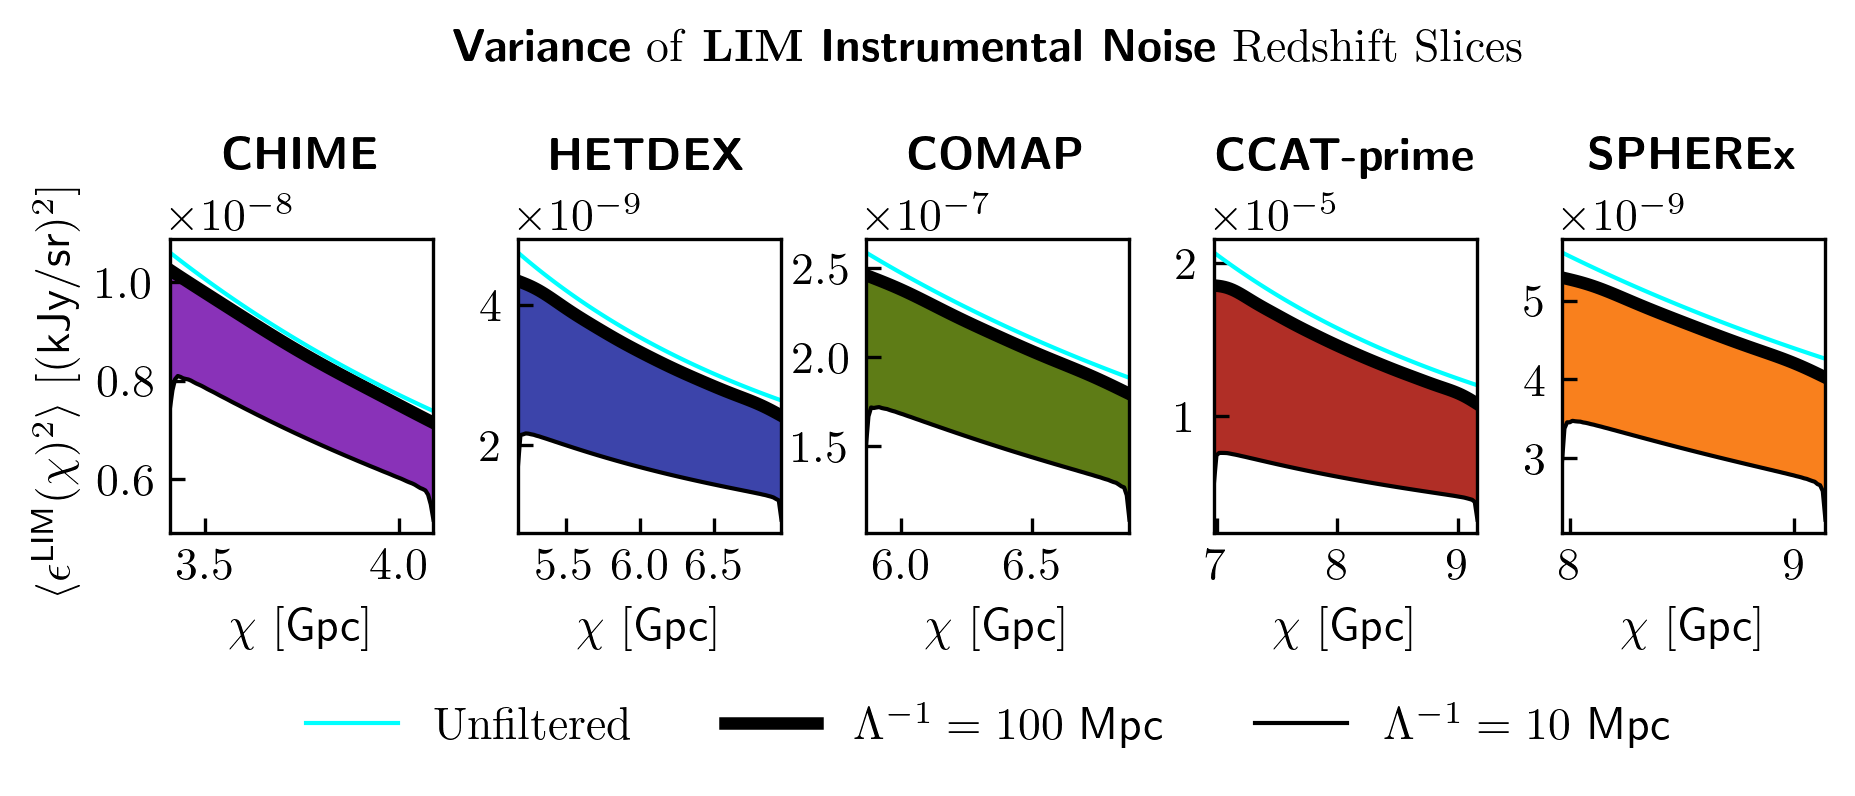

In [31]:
fig, _axs = plt.subplots(nrows=1, ncols=5, 
                             figsize = (5.8, 3.65/3), facecolor = 'none', dpi = 300,)
plt.tight_layout(pad = 0.0)



for e_idx, e in enumerate(e_order):
    print(e_idx, e)
    ax = _axs[e_idx]
    c = e_colors[e]
    
    zmin = experiments[e]['zmin']
    zmax = experiments[e]['zmax']
    line_str = experiments[e]['line_str']
    
    Omega_field  =  np.array(experiments[e]['Omega_field'].to(u.rad**2)) #rad^2
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    
    chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_bins + 1)
    chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
    dchi_binned = np.mean(np.diff(chi_bin_edges))

    extent = [0,1,0,1]
    _, Pei = experiments[e]['f_Pei']()
    Pei = np.max(Pei).to(u.Mpc**3  * (u.kJy/u.sr)**2)
    Pei = Pei.value # kJy2 Mpc3 / sr2

    def get_eHIeHI(Lambda_idx):
        eComb_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_comb_'
        eComb_fname +='zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, 
                                                                                   zmax, 
                                                                                   Lambda_idx, 
                                                                                   n_bins)
        eComb = np.load(eComb_fname)
        return Pei * eComb

    eIeI = Pei * np.diag(f_eIeI(chi=chi_bin_centers, dchi=dchi_binned, Lambda=0))
    eHIeHI_10 = get_eHIeHI(24)
    eHIeHI_100 = get_eHIeHI(18)

    ax.plot(chi_bin_centers/1000,
                np.diag(eHIeHI_100), c='k', lw=3, ls='-')

    ax.plot(chi_bin_centers/1000,
                np.diag(eHIeHI_10), c='k', lw=1, ls='-')

    ax.plot(chi_bin_centers/1000,
                np.diag(eIeI), c='cyan', lw=1, ls='-')

    ax.fill_between(chi_bin_centers/1000,
                np.diag(eHIeHI_10), np.diag(eHIeHI_100), color=c, lw=0)

    ax.set_xlim(min(chi_bin_centers)/1000, max(chi_bin_centers)/1000)
#     ax.set_yscale('log')
    ax.set_xlabel('$\chi$ [{\sf Gpc}]')
        
        
        
    ax.set_title( r'\textsf{\textbf{%s}}'%(e),
                 fontsize=11)
    
    
_axs[0].set_ylabel(r'$\langle \epsilon^{\sf LIM}(\chi)^2\rangle$ [$({\sf kJy/sr})^2$]')
 
    
fig.text(plt_cntr, 1.42, r"\textsf{\textbf{Variance}} of \textbf{LIM \textsf{Instrumental Noise}} Redshift Slices",
         ha='center', 
         va='bottom', 
        fontsize=11)


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Line2D([0], [0], color='cyan', lw=1, ls='-', label='Unfiltered'),
    Line2D([0], [0], color='k', lw=3, label=r'$\Lambda^{-1}=100\ {\sf Mpc}$'),
    Line2D([0], [0], color='k', lw=1, label=r'$\Lambda^{-1}=10\ {\sf Mpc}$'),
]

fig.legend(handles=legend_elements, 
           loc='lower center',
           bbox_to_anchor=(plt_cntr, -0.11*5),
           frameon=False,
           ncol=3)


plt.savefig('figures/013.005.pdf', bbox_inches='tight')